            Fed_Funds_Rate   SP500  Inflation  Unemployment_Rate
Date                                                            
2019-11-01            1.55  3037.0        2.1                3.6
2019-12-01            1.55  3113.0        2.3                3.6
2020-01-01            1.55  3257.0        2.5                3.6
2020-02-01            1.58  3248.0        2.3                3.5
2020-03-01            0.65  3090.0        1.5                4.4
...                    ...     ...        ...                ...
2024-07-01            5.33  5471.0        3.2                4.3
2024-08-01            5.33  5537.0        3.4                4.2
2024-09-01            5.13  5623.0        3.1                4.1
2024-10-01            4.83  5757.0        3.0                4.1
2024-11-01            4.64  5723.0        2.7                4.2

[61 rows x 4 columns]

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=32.1452 , p=0.0000  , df_denom=57, df_num=1
ssr based chi2

c:\Users\chole\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


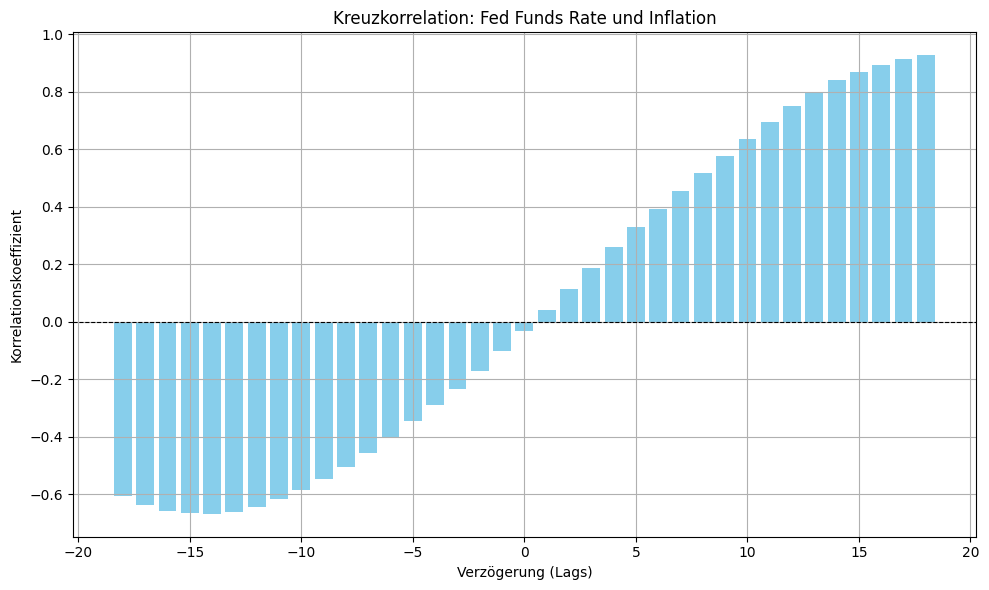

c:\Users\chole\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<Figure size 1000x600 with 0 Axes>

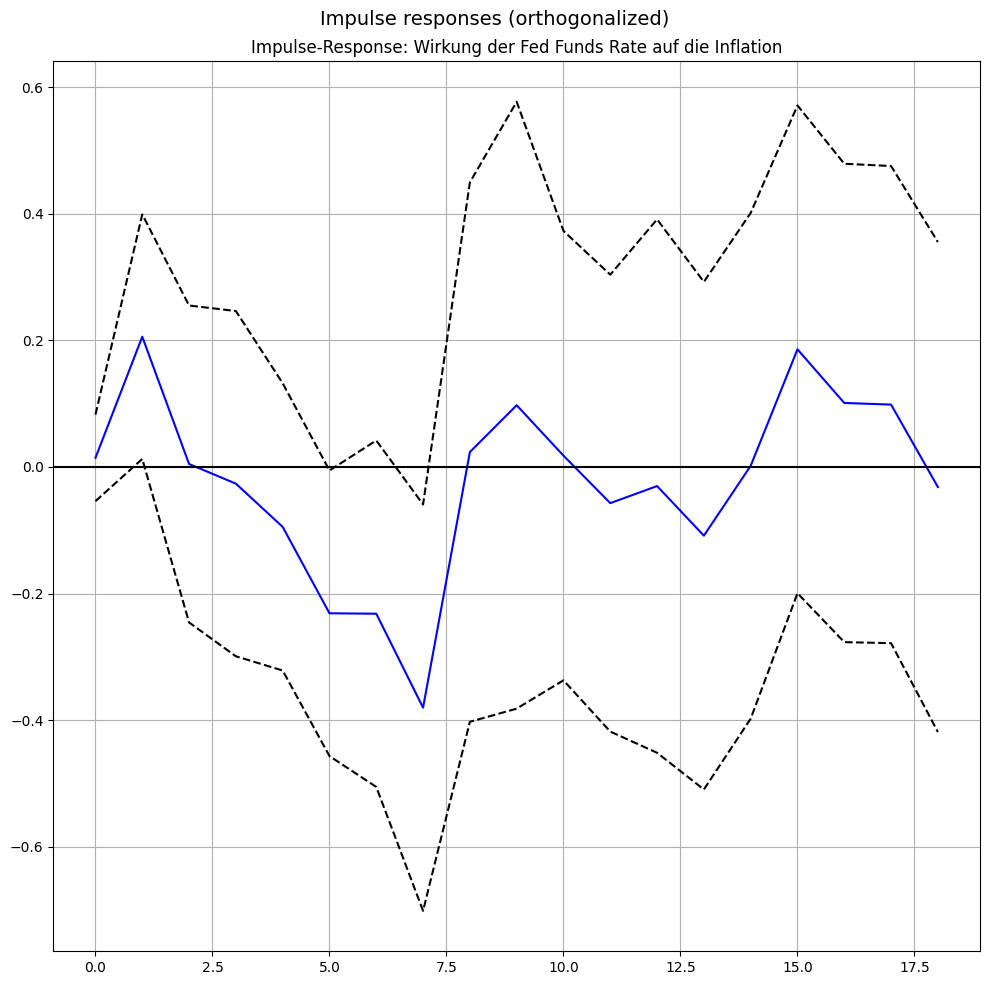

Durchschnittlicher Return bei positiver Überraschung: 1.19%
Durchschnittlicher Return bei negativer Überraschung: -0.98%
Regression für positive Überraschungen:
Koeffizient: -22.12, R²: 0.61
Regression für negative Überraschungen:
Koeffizient: -0.54, R²: 0.00
Modellkoeffizient (Logistische Regression): -0.92


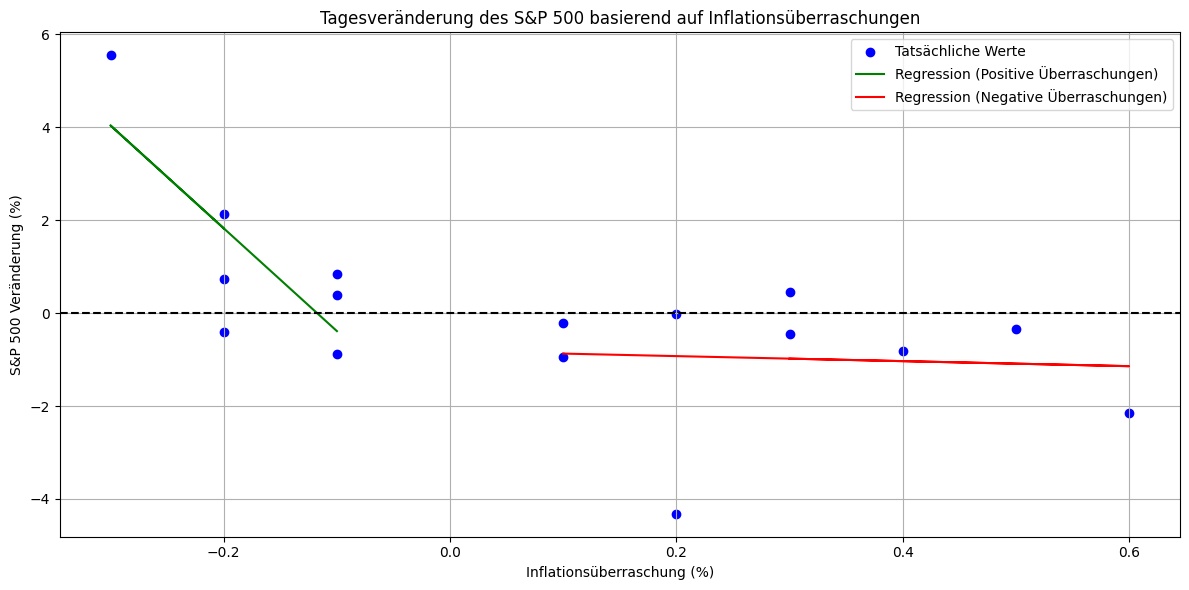

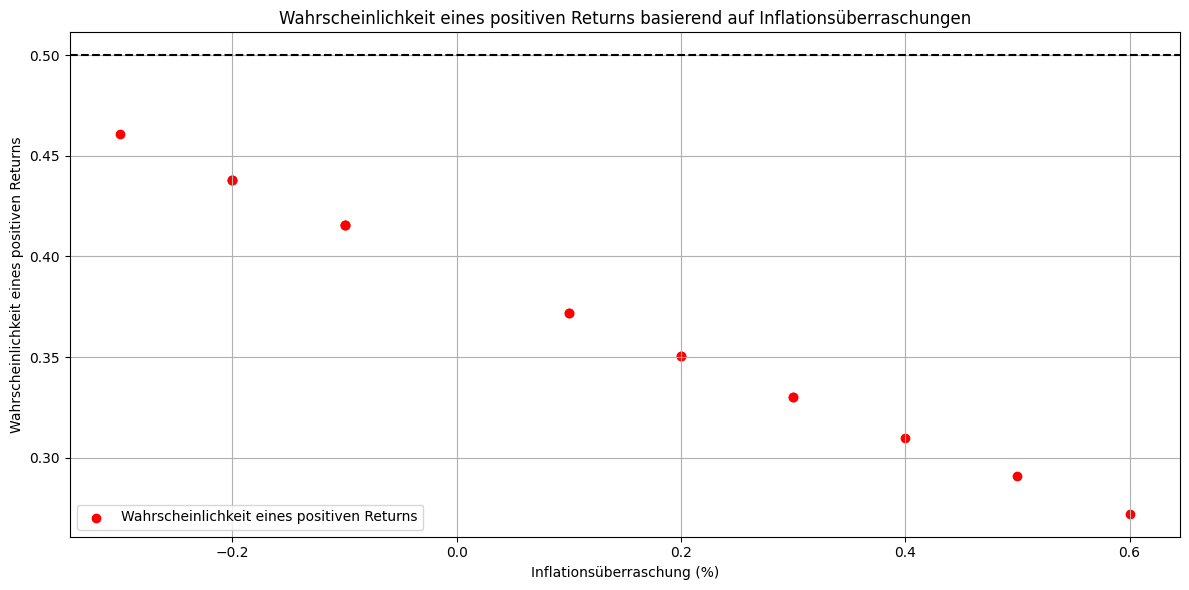

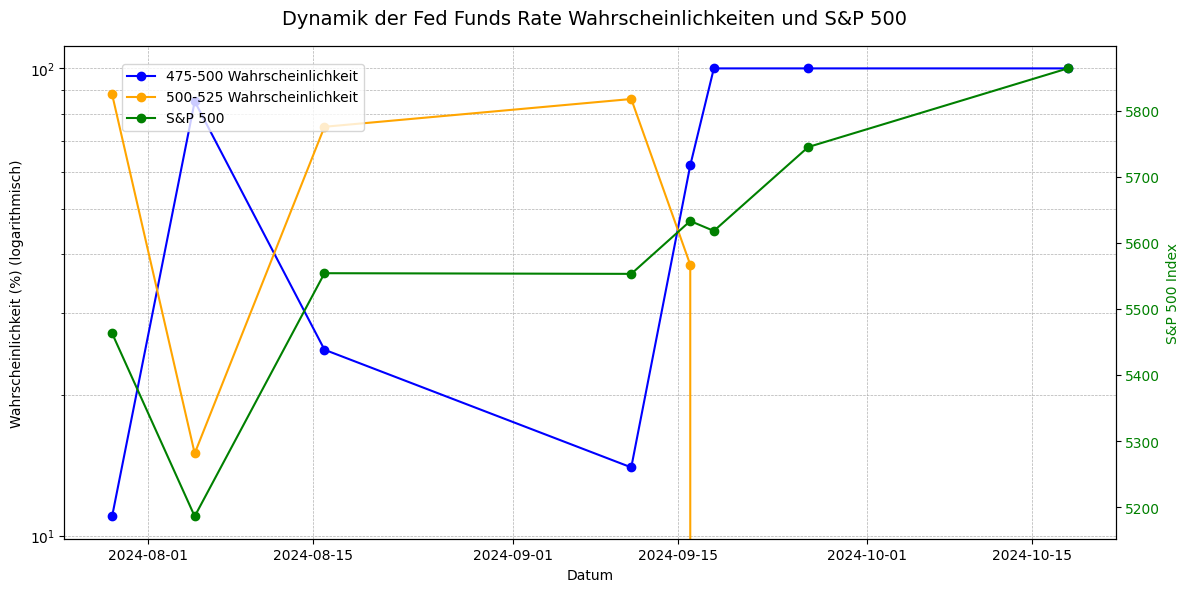

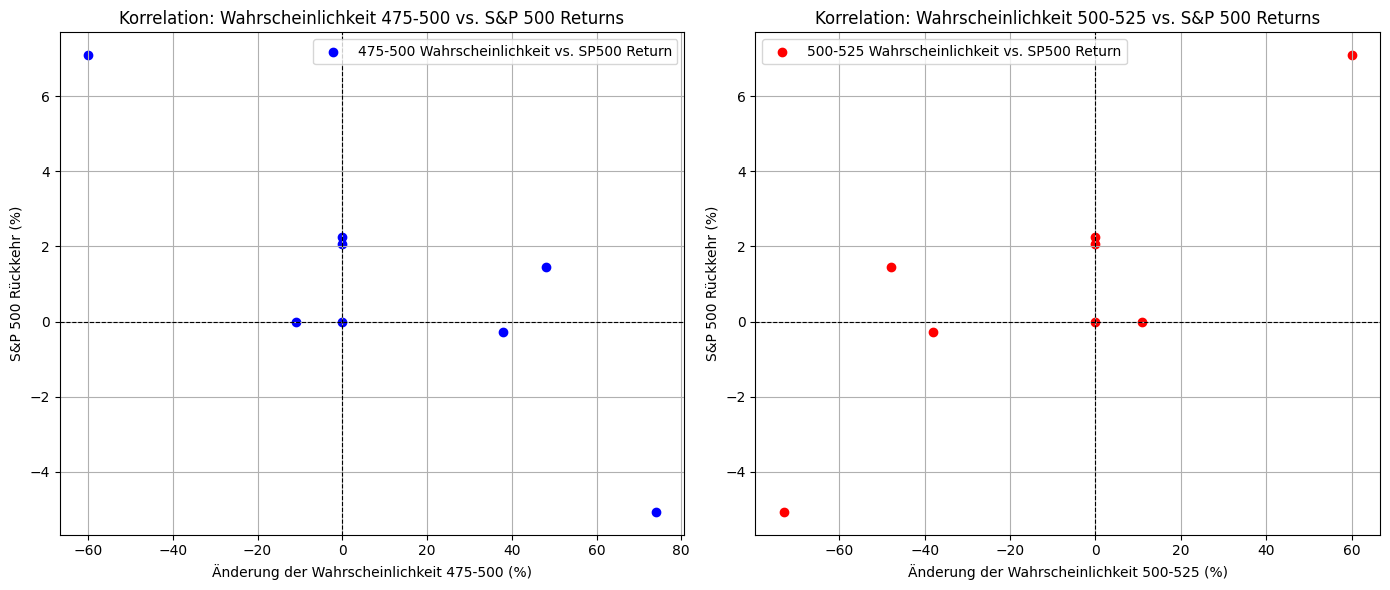

Korrelation zwischen Wahrscheinlichkeit 475-500 und S&P 500 Returns: -0.84
Korrelation zwischen Wahrscheinlichkeit 500-525 und S&P 500 Returns: 0.84

Regressionsergebnisse für 475-500 Wahrscheinlichkeit:
R²: 0.71
Koeffizient: -0.07, Intercept: 1.71

Regressionsergebnisse für 500-525 Wahrscheinlichkeit:
R²: 0.70
Koeffizient: 0.07, Intercept: 1.70


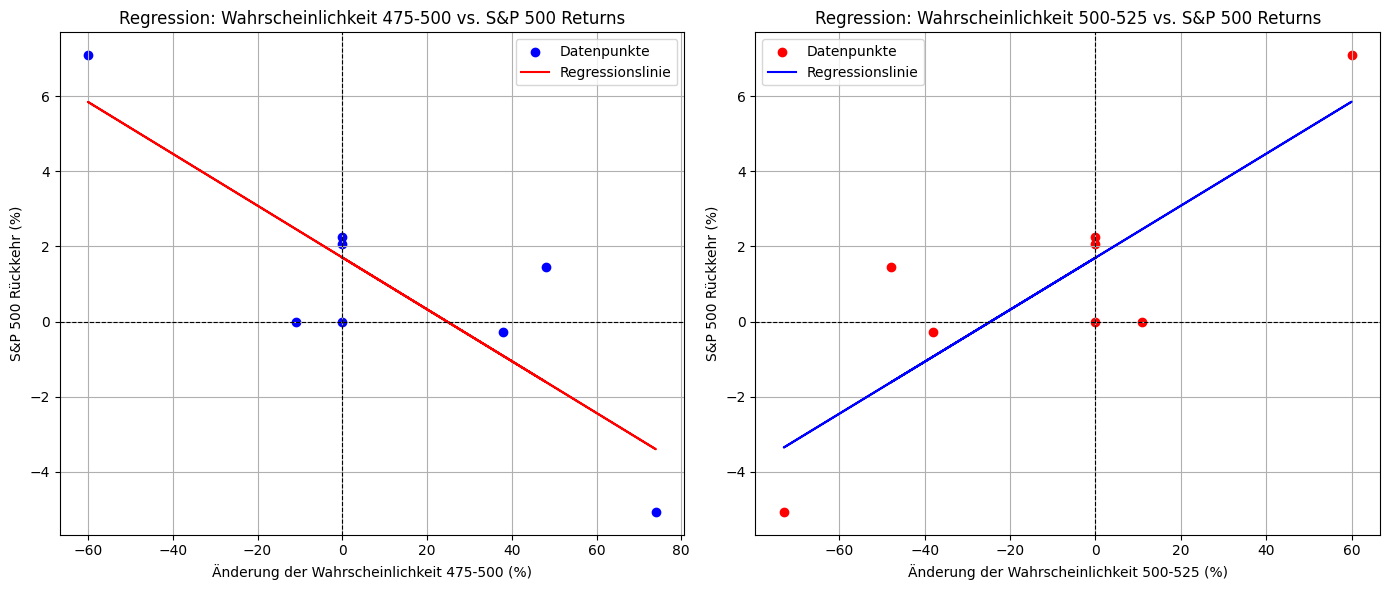

In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Daten (für die Regressionsanalyse)
data = {
    'Date': [
        '2019-11-01', '2019-12-01', '2020-01-01', '2020-02-01', '2020-03-01',
        '2020-04-01', '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
        '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01', '2021-01-01',
        '2021-02-01', '2021-03-01', '2021-04-01', '2021-05-01', '2021-06-01',
        '2021-07-01', '2021-08-01', '2021-09-01', '2021-10-01', '2021-11-01',
        '2021-12-01', '2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01',
        '2022-05-01', '2022-06-01', '2022-07-01', '2022-08-01', '2022-09-01',
        '2022-10-01', '2022-11-01', '2022-12-01', '2023-01-01', '2023-02-01',
        '2023-03-01', '2023-04-01', '2023-05-01', '2023-06-01', '2023-07-01',
        '2023-08-01', '2023-09-01', '2023-10-01', '2023-11-01', '2023-12-01',
        '2024-01-01', '2024-02-01', '2024-03-01', '2024-04-01', '2024-05-01',
        '2024-06-01', '2024-07-01', '2024-08-01', '2024-09-01', '2024-10-01',
        '2024-11-01'
    ],
    'Fed_Funds_Rate': [
        1.55, 1.55, 1.55, 1.58, 0.65, 0.05, 0.05, 0.08, 0.09, 0.10,
        0.09, 0.09, 0.09, 0.09, 0.09, 0.08, 0.07, 0.07, 0.06, 0.08,
        0.10, 0.09, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.20, 0.33,
        0.77, 1.21, 1.68, 2.33, 2.56, 3.08, 3.78, 4.10, 4.33, 4.57,
        4.65, 4.83, 5.06, 5.08, 5.12, 5.33, 5.33, 5.33, 5.33, 5.33,
        5.33, 5.33, 5.33, 5.33, 5.33, 5.33, 5.33, 5.33, 5.13, 4.83,
        4.64
    ],
    'SP500': [
        3037.00, 3113.00, 3257.00, 3248.00, 3090.00, 2470.00, 2830.00, 3055.00, 3100.00, 3294.00,
        3526.00, 3380.00, 3310.00, 3662.00, 3700.00, 3773.00, 3901.00, 4019.00, 4192.00, 4202.00,
        4297.00, 4387.00, 4524.00, 4307.00, 4605.00, 4513.00, 4796.00, 4546.00, 4306.00, 4530.00,
        4155.00, 4101.00, 3785.00, 4118.00, 3955.00, 3678.00, 3856.00, 4076.00, 3824.00, 4119.00,
        3951.00, 4124.00, 4167.00, 4179.00, 4455.00, 4576.00, 4507.00, 4337.00, 4237.00, 4595.00,
        4745.00, 4861.00, 5096.00, 5254.00, 5035.00, 5277.00, 5471.00, 5537.00, 5623.00, 5757.00,
        5723.00
    ],
    'Inflation': [
2.1, 2.3, 2.5, 2.3, 1.5, 0.3, 0.1, 0.6, 1.0, 1.3,
        1.4, 1.2, 1.2, 1.4, 1.4, 1.7, 2.6, 4.2, 5.0, 5.4,
        5.4, 5.3, 5.4, 6.2, 6.8, 7.0, 7.5, 7.9, 8.5, 8.3,
        8.6, 9.1, 8.5, 8.3, 8.2, 7.7, 7.1, 6.5, 6.4, 6.0,
        5.0, 4.9, 4.0, 3.0, 3.2, 3.7, 3.7, 3.2, 3.1, 2.8,
        3.0, 3.2, 3.5, 3.7, 3.5, 3.6, 3.2, 3.4, 3.1, 3.0,
        2.7
    ],
    'Unemployment_Rate': [
3.6, 3.6, 3.6, 3.5, 4.4, 14.8, 13.2, 11.0, 10.2, 8.4,
        7.8, 6.8, 6.7, 6.7, 6.4, 6.2, 6.1, 6.1, 5.8, 5.9,
        5.4, 5.1, 4.7, 4.5, 4.1, 3.9, 4.0, 3.8, 3.6, 3.7,
        3.6, 3.6, 3.5, 3.6, 3.5, 3.6, 3.6, 3.5, 3.4, 3.6,
        3.5, 3.4, 3.7, 3.6, 3.5, 3.8, 3.8, 3.8, 3.7, 3.7,
        3.7, 3.9, 3.8, 3.9, 4.0, 4.1, 4.3, 4.2, 4.1, 4.1,
        4.2
    ]
}

# DataFrame erstellen
df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# DataFrame anzeigen
print(df)

import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests

# Daten vorbereiten
data = df[['Fed_Funds_Rate', 'Inflation']]  # Fed Funds Rate und Inflation auswählen

# Granger-Kausalität testen
max_lag = 18  # Typische Übertragungsverzögerung (6 bis 18 Monate)
results = grangercausalitytests(data, max_lag, verbose=True)

# Ergebnisse interpretieren
print("\nGranger-Kausalitätstest-Ergebnisse:")
for lag, result in results.items():
    f_test_p_value = result[0]['ssr_ftest'][1]  # p-Wert des F-Tests
    print(f"Lag {lag}: p-Wert des F-Tests = {f_test_p_value}")
    
    
    import numpy as np
import matplotlib.pyplot as plt

# Kreuzkorrelation berechnen
def cross_correlation(series1, series2, max_lags):
    lags = range(-max_lags, max_lags + 1)
    ccs = [series1.corr(series2.shift(lag)) for lag in lags]
    return lags, ccs

# Maximal erlaubte Verzögerung (6 bis 18 Monate)
max_lags = 18

# Berechnung der Kreuzkorrelation
lags, ccs = cross_correlation(df['Fed_Funds_Rate'], df['Inflation'], max_lags)

# Visualisierung
plt.figure(figsize=(10, 6))
plt.bar(lags, ccs, color='skyblue')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.title('Kreuzkorrelation: Fed Funds Rate und Inflation')
plt.xlabel('Verzögerung (Lags)')
plt.ylabel('Korrelationskoeffizient')
plt.grid(True)
plt.tight_layout()
plt.show()

from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt

# VAR-Modell erstellen und anpassen
model = VAR(df[['Fed_Funds_Rate', 'Inflation']])
results = model.fit(maxlags=18)

# Impulse-Response-Analyse durchführen
irf = results.irf(18)  # 18 Schritte in die Zukunft analysieren

# Impulse-Response-Analyse für den Einfluss der Fed Funds Rate auf die Inflation
plt.figure(figsize=(10, 6))
irf.plot(orth=True, impulse='Fed_Funds_Rate', response='Inflation')
plt.title('Impulse-Response: Wirkung der Fed Funds Rate auf die Inflation')
plt.grid(True)
plt.tight_layout()
plt.show()


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression

# Daten einfügen
actual_inflation = [
    2.40, 2.90, 3.00, 3.30, 3.50, 5.00, 6.40, 7.10, 7.70, 8.30,
    8.50, 9.10, 6.20, 4.20, 5.40, 5.00
]
forecast_inflation = [
    2.30, 3.00, 3.10, 3.40, 3.40, 5.20, 6.20, 7.30, 8.00, 8.10,
    8.70, 8.80, 5.80, 3.60, 4.90, 4.70
]
daily_return = [
    -0.21, 0.38, -0.88, 0.85, -0.95, -0.41, -0.03, 0.73, 5.55, -4.32,
    2.13, -0.45, -0.82, -2.15, -0.35, 0.46
]

# DataFrame erstellen
data = {
    'Actual_Inflation': actual_inflation,
    'Forecast_Inflation': forecast_inflation,
    'Daily_Return': daily_return
}
df = pd.DataFrame(data)

# Überraschung berechnen
df['Inflation_Surprise'] = df['Actual_Inflation'] - df['Forecast_Inflation']

# 1. Positive und negative Überraschungen analysieren
df['Surprise_Type'] = np.where(df['Inflation_Surprise'] > 0, 'Negative', 'Positive')
positive_mean = df[df['Surprise_Type'] == 'Positive']['Daily_Return'].mean()
negative_mean = df[df['Surprise_Type'] == 'Negative']['Daily_Return'].mean()

print(f"Durchschnittlicher Return bei positiver Überraschung: {positive_mean:.2f}%")
print(f"Durchschnittlicher Return bei negativer Überraschung: {negative_mean:.2f}%")

# 2. Asymmetrische Reaktionsanalyse
positive_surprise = df[df['Inflation_Surprise'] <= 0]
negative_surprise = df[df['Inflation_Surprise'] > 0]

model_positive = LinearRegression().fit(positive_surprise[['Inflation_Surprise']], positive_surprise['Daily_Return'])
model_negative = LinearRegression().fit(negative_surprise[['Inflation_Surprise']], negative_surprise['Daily_Return'])

print("Regression für positive Überraschungen:")
print(f"Koeffizient: {model_positive.coef_[0]:.2f}, R²: {model_positive.score(positive_surprise[['Inflation_Surprise']], positive_surprise['Daily_Return']):.2f}")

print("Regression für negative Überraschungen:")
print(f"Koeffizient: {model_negative.coef_[0]:.2f}, R²: {model_negative.score(negative_surprise[['Inflation_Surprise']], negative_surprise['Daily_Return']):.2f}")

# 3. Logistische Regression: Wahrscheinlichkeit eines positiven Returns
df['Positive_Return'] = (df['Daily_Return'] > 0).astype(int)
log_model = LogisticRegression().fit(df[['Inflation_Surprise']], df['Positive_Return'])
df['Positive_Probability'] = log_model.predict_proba(df[['Inflation_Surprise']])[:, 1]

print(f"Modellkoeffizient (Logistische Regression): {log_model.coef_[0][0]:.2f}")

# Visualisierung mit Regressionslinie
plt.figure(figsize=(12, 6))
plt.scatter(df['Inflation_Surprise'], df['Daily_Return'], label="Tatsächliche Werte", color='blue')

# Hinzufügen der Regressionslinie für positive Überraschungen
plt.plot(
    positive_surprise['Inflation_Surprise'],
    model_positive.predict(positive_surprise[['Inflation_Surprise']]),
    color='green',
    label='Regression (Positive Überraschungen)'
)

# Hinzufügen der Regressionslinie für negative Überraschungen
plt.plot(
    negative_surprise['Inflation_Surprise'],
    model_negative.predict(negative_surprise[['Inflation_Surprise']]),
    color='red',
    label='Regression (Negative Überraschungen)'
)

plt.axhline(0, color='black', linestyle='--')
plt.xlabel("Inflationsüberraschung (%)")
plt.ylabel("S&P 500 Veränderung (%)")
plt.title("Tagesveränderung des S&P 500 basierend auf Inflationsüberraschungen")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


# Visualisierung der positiven Wahrscheinlichkeit
plt.figure(figsize=(12, 6))
plt.scatter(df['Inflation_Surprise'], df['Positive_Probability'], color='red', label="Wahrscheinlichkeit eines positiven Returns")
plt.axhline(0.5, color='black', linestyle='--')
plt.xlabel("Inflationsüberraschung (%)")
plt.ylabel("Wahrscheinlichkeit eines positiven Returns")
plt.title("Wahrscheinlichkeit eines positiven Returns basierend auf Inflationsüberraschungen")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Daten einfügen
data = {
    'Date': [
        '2024-07-29', '2024-08-05', '2024-08-16', '2024-09-11', '2024-09-16', '2024-09-18', '2024-09-26', '2024-10-18'
    ],
    'Prob_475_500': [11, 85, 25, 14, 62, 100, 100, 100],
    'Prob_500_525': [88, 15, 75, 86, 38, 0, 0, 0],
    'SP500': [5463, 5186, 5554, 5553, 5633, 5618, 5745, 5864]
}

# DataFrame erstellen
df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Date'])

# Änderungen in den Wahrscheinlichkeiten berechnen
df['Change_Prob_475_500'] = df['Prob_475_500'].diff()
df['Change_Prob_500_525'] = df['Prob_500_525'].diff()

# Prozentuale Veränderung im S&P 500 berechnen
df['SP500_Return'] = df['SP500'].pct_change() * 100

# Visualisierung der Wahrscheinlichkeiten und S&P 500 auf einer logarithmischen Skala
fig, ax1 = plt.subplots(figsize=(12, 6))

# Wahrscheinlichkeiten plotten
ax1.plot(df['Date'], df['Prob_475_500'], label='475-500 Wahrscheinlichkeit', marker='o', color='blue')
ax1.plot(df['Date'], df['Prob_500_525'], label='500-525 Wahrscheinlichkeit', marker='o', color='orange')
ax1.set_yscale('log')
ax1.set_xlabel("Datum")
ax1.set_ylabel("Wahrscheinlichkeit (%) (logarithmisch)", color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.grid(True, which="both", linestyle="--", linewidth=0.5)

# Zweite Achse für den S&P 500
ax2 = ax1.twinx()
ax2.plot(df['Date'], df['SP500'], label='S&P 500', marker='o', color='green')
ax2.set_ylabel("S&P 500 Index", color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Titel und Legende
fig.suptitle("Dynamik der Fed Funds Rate Wahrscheinlichkeiten und S&P 500", fontsize=14)
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))
fig.tight_layout()
plt.show()

import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# S&P 500 Returns und Wahrscheinlichkeiten für 475-500 und 500-525
X_475_500 = df['Change_Prob_475_500'].fillna(0).values.reshape(-1, 1)  # Wahrscheinlichkeitsänderung 475-500
X_500_525 = df['Change_Prob_500_525'].fillna(0).values.reshape(-1, 1)  # Wahrscheinlichkeitsänderung 500-525
y_sp500 = df['SP500_Return'].fillna(0).values  # S&P 500 Returns

# Scatterplots für visuelle Analyse
plt.figure(figsize=(14, 6))

# Wahrscheinlichkeitsänderung 475-500 vs. SP500 Return
plt.subplot(1, 2, 1)
plt.scatter(X_475_500, y_sp500, color='blue', label='475-500 Wahrscheinlichkeit vs. SP500 Return')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.axvline(0, color='black', linestyle='--', linewidth=0.8)
plt.title("Korrelation: Wahrscheinlichkeit 475-500 vs. S&P 500 Returns")
plt.xlabel("Änderung der Wahrscheinlichkeit 475-500 (%)")
plt.ylabel("S&P 500 Rückkehr (%)")
plt.legend()
plt.grid(True)

# Wahrscheinlichkeitsänderung 500-525 vs. SP500 Return
plt.subplot(1, 2, 2)
plt.scatter(X_500_525, y_sp500, color='red', label='500-525 Wahrscheinlichkeit vs. SP500 Return')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.axvline(0, color='black', linestyle='--', linewidth=0.8)
plt.title("Korrelation: Wahrscheinlichkeit 500-525 vs. S&P 500 Returns")
plt.xlabel("Änderung der Wahrscheinlichkeit 500-525 (%)")
plt.ylabel("S&P 500 Rückkehr (%)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Berechnung der Korrelation
correlation_475_500 = np.corrcoef(df['Change_Prob_475_500'].fillna(0), df['SP500_Return'].fillna(0))[0, 1]
correlation_500_525 = np.corrcoef(df['Change_Prob_500_525'].fillna(0), df['SP500_Return'].fillna(0))[0, 1]
print(f"Korrelation zwischen Wahrscheinlichkeit 475-500 und S&P 500 Returns: {correlation_475_500:.2f}")
print(f"Korrelation zwischen Wahrscheinlichkeit 500-525 und S&P 500 Returns: {correlation_500_525:.2f}")

# Lineare Regression für 475-500
model_475 = LinearRegression().fit(X_475_500, y_sp500)
print("\nRegressionsergebnisse für 475-500 Wahrscheinlichkeit:")
print(f"R²: {model_475.score(X_475_500, y_sp500):.2f}")
print(f"Koeffizient: {model_475.coef_[0]:.2f}, Intercept: {model_475.intercept_:.2f}")

# Lineare Regression für 500-525
model_500 = LinearRegression().fit(X_500_525, y_sp500)
print("\nRegressionsergebnisse für 500-525 Wahrscheinlichkeit:")
print(f"R²: {model_500.score(X_500_525, y_sp500):.2f}")
print(f"Koeffizient: {model_500.coef_[0]:.2f}, Intercept: {model_500.intercept_:.2f}")

# Visualisierung der Regressionslinien
plt.figure(figsize=(14, 6))

# Regressionslinie für 475-500
plt.subplot(1, 2, 1)
plt.scatter(X_475_500, y_sp500, color='blue', label='Datenpunkte')
plt.plot(X_475_500, model_475.predict(X_475_500), color='red', label='Regressionslinie')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.axvline(0, color='black', linestyle='--', linewidth=0.8)
plt.title("Regression: Wahrscheinlichkeit 475-500 vs. S&P 500 Returns")
plt.xlabel("Änderung der Wahrscheinlichkeit 475-500 (%)")
plt.ylabel("S&P 500 Rückkehr (%)")
plt.legend()
plt.grid(True)

# Regressionslinie für 500-525
plt.subplot(1, 2, 2)
plt.scatter(X_500_525, y_sp500, color='red', label='Datenpunkte')
plt.plot(X_500_525, model_500.predict(X_500_525), color='blue', label='Regressionslinie')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.axvline(0, color='black', linestyle='--', linewidth=0.8)
plt.title("Regression: Wahrscheinlichkeit 500-525 vs. S&P 500 Returns")
plt.xlabel("Änderung der Wahrscheinlichkeit 500-525 (%)")
plt.ylabel("S&P 500 Rückkehr (%)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

